In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [147]:
#open the webpage and get the table from the website
html = urlopen("https://www.nytimes.com/interactive/2020/us/elections/democratic-polls.html")
html

In [148]:
#get the html code from the website
election = BeautifulSoup(html)
election

<!DOCTYPE html>

<!--[if (gt IE 9)|!(IE)]> <!--><html class="no-js page-interactive section-us page-theme-standard template-minimal tone-news has-comments page-interactive-default limit-small layout-xlarge app-interactive" itemid="https://www.nytimes.com/interactive/2020/us/elections/democratic-polls.html" itemscope="" itemtype="http://schema.org/NewsArticle" lang="en" xmlns:og="http://opengraphprotocol.org/schema/"><!--<![endif]-->
<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 page-interactive section-us page-theme-standard template-minimal tone-news has-comments page-interactive-default limit-small layout-xlarge app-interactive" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->
<!--[if IE 8]> <html lang="en" class="no-js ie8 lt-ie10 lt-ie9 page-interactive section-us page-theme-standard template-minimal tone-news has-comments page-interactive-default limit-small layout-xlarge app-interactive" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->
<!--[if 

In [150]:
table = election.find("table", {"class":"g-candidates-table g-sortable-table"})
table

<table class="g-candidates-table g-sortable-table" data-sortedby="poll_avg" data-sortedorder="desc">
<thead>
<tr>
<th class="g-cand-info" data-col="slug">
<div class="g-debate-label">
<svg class="g-check-icon" viewbox="0 0 24 24">
<path d="M12,2A10,10 0 0,1 22,12A10,10 0 0,1 12,22A10,10 0 0,1 2,12A10,10 0 0,1 12,2M11,16.5L18,9.5L16.59,8.09L11,13.67L7.91,10.59L6.5,12L11,16.5Z" fill="#000000"></path>
</svg>
<span>Qualified for the December debate* </span>
</div>
</th>
<th class="g-data-cell g-poll_avg g-sorted" data-col="poll_avg">
<div>
<span class="g-sort-triangle"></span><span class="g-desktop-label">National polling average</span><span class="g-mobile-label">Polling Average</span>
</div>
</th>
<th class="g-data-cell g-total_indiv_contrib" data-col="total_indiv_contrib">
<div>
<span class="g-sort-triangle"></span><span class="g-desktop-label">Individual contributions†</span><span class="g-mobile-label">Individual contrib.†</span>
</div>
</th>
<th class="g-data-cell g-news_coverage_mos

In [151]:
#get the variable names from the header of the table
rows = table.find_all("tr")

In [152]:
rows[0].find_all("th")

[<th class="g-cand-info" data-col="slug">
 <div class="g-debate-label">
 <svg class="g-check-icon" viewbox="0 0 24 24">
 <path d="M12,2A10,10 0 0,1 22,12A10,10 0 0,1 12,22A10,10 0 0,1 2,12A10,10 0 0,1 12,2M11,16.5L18,9.5L16.59,8.09L11,13.67L7.91,10.59L6.5,12L11,16.5Z" fill="#000000"></path>
 </svg>
 <span>Qualified for the December debate* </span>
 </div>
 </th>, <th class="g-data-cell g-poll_avg g-sorted" data-col="poll_avg">
 <div>
 <span class="g-sort-triangle"></span><span class="g-desktop-label">National polling average</span><span class="g-mobile-label">Polling Average</span>
 </div>
 </th>, <th class="g-data-cell g-total_indiv_contrib" data-col="total_indiv_contrib">
 <div>
 <span class="g-sort-triangle"></span><span class="g-desktop-label">Individual contributions†</span><span class="g-mobile-label">Individual contrib.†</span>
 </div>
 </th>, <th class="g-data-cell g-news_coverage_most_recent" data-col="news_coverage_most_recent">
 <div>
 <span class="g-sort-triangle"></span><s

In [153]:
fields = [i.text.replace("\n","").replace("Polling Average","").replace("†Individual contrib.†","").replace("Weekly media","") for i in rows[0].find_all('th')]
fields

['Qualified for the December debate* ',
 'National polling average',
 'Individual contributions',
 'Weekly news coverage']

In [154]:
for i in range(1, len(rows)):
    values = [cell.text.replace('\n', "") for cell in rows[i].find_all('td')]
    print(values)
    
    len(rows)

['Joseph R. Biden Jr.Biden', '27% ', '$37.6m ', '#1 ']
['Bernie SandersSanders', '17% ', '$61.5m ', '#4 ']
['Elizabeth WarrenWarren', '16% ', '$49.8m ', '#3 ']
['Pete ButtigiegButtigieg', '10% ', '$51.5m ', '#2 ']
['Michael R. BloombergBloomberg', '4% ', '— ', '#4 ']
['Amy KlobucharKlobuchar', '3% ', '$13.9m ', '#8 ']
['Andrew YangYang', '3% ', '$15.1m ', '#11 ']
['Cory BookerBooker', '2% ', '$15.5m ', '#6 ']
['Tom SteyerSteyer', '1% ', '$2.0m ', '#7 ']
['Julián CastroCastro', '1% ', '$7.6m ', '#9 ']
['Tulsi GabbardGabbard', '< 1% ', '$6.5m ', '#10 ']
['Michael BennetBennet', '< 1% ', '$4.9m ', '#13 ']
['John DelaneyDelaney', '< 1% ', '$2.4m ', '#14 ']
['Marianne WilliamsonWilliamson', '< 1% ', '$6.1m ', '#15 ']
['Deval PatrickPatrick', '< 1% ', '— ', '#12 ']
['Kamala HarrisHarris', 'Dropped out Dec. 3']
['Steve BullockBullock', 'Dropped out Dec. 2']
['Joe SestakSestak', 'Dropped out Dec. 1']
['Wayne MessamMessam', 'Dropped out Nov. 20']
['Beto O’RourkeO’Rourke', 'Dropped out Nov. 1']


In [118]:
df = pd.DataFrame()

In [155]:
for i in range(1, len(rows)):
    values = [cell.text.replace('\n', "") for cell in rows[i].find_all('td')]
   #print(values)
    df = df.append(pd.Series(values), ignore_index = True)

In [156]:
updateddf = df[0:15]
updateddf

,0,1,2,3
0,Joseph R. Biden Jr.Biden,27%,$37.6m,#1
1,Bernie SandersSanders,17%,$61.5m,#4
2,Elizabeth WarrenWarren,16%,$49.8m,#3
3,Pete ButtigiegButtigieg,10%,$51.5m,#2
4,Michael R. BloombergBloomberg,4%,—,#4
5,Amy KlobucharKlobuchar,3%,$13.9m,#8
6,Andrew YangYang,3%,$15.1m,#11
7,Cory BookerBooker,2%,$15.5m,#6
8,Tom SteyerSteyer,1%,$2.0m,#7
9,Julián CastroCastro,1%,$7.6m,#9


In [157]:
updateddf.columns = fields
updateddf

,Qualified for the December debate*,National polling average,Individual contributions,Weekly news coverage
0,Joseph R. Biden Jr.Biden,27%,$37.6m,#1
1,Bernie SandersSanders,17%,$61.5m,#4
2,Elizabeth WarrenWarren,16%,$49.8m,#3
3,Pete ButtigiegButtigieg,10%,$51.5m,#2
4,Michael R. BloombergBloomberg,4%,—,#4
5,Amy KlobucharKlobuchar,3%,$13.9m,#8
6,Andrew YangYang,3%,$15.1m,#11
7,Cory BookerBooker,2%,$15.5m,#6
8,Tom SteyerSteyer,1%,$2.0m,#7
9,Julián CastroCastro,1%,$7.6m,#9


In [158]:
name = election.find_all("span", {"class":"g-desktop"})
name

[<span class="g-desktop">Joseph R. Biden Jr.</span>,
 <span class="g-desktop">Bernie Sanders</span>,
 <span class="g-desktop">Elizabeth Warren</span>,
 <span class="g-desktop">Pete Buttigieg</span>,
 <span class="g-desktop">Michael R. Bloomberg</span>,
 <span class="g-desktop">Amy Klobuchar</span>,
 <span class="g-desktop">Andrew Yang</span>,
 <span class="g-desktop">Cory Booker</span>,
 <span class="g-desktop">Tom Steyer</span>,
 <span class="g-desktop">Julián Castro</span>,
 <span class="g-desktop">Tulsi Gabbard</span>,
 <span class="g-desktop">Michael Bennet</span>,
 <span class="g-desktop">John Delaney</span>,
 <span class="g-desktop">Marianne Williamson</span>,
 <span class="g-desktop">Deval Patrick</span>,
 <span class="g-desktop">Kamala Harris</span>,
 <span class="g-desktop">Steve Bullock</span>,
 <span class="g-desktop">Joe Sestak</span>,
 <span class="g-desktop">Wayne Messam</span>,
 <span class="g-desktop">Beto O’Rourke</span>,
 <span class="g-desktop">Tim Ryan</span>,
 <spa

In [159]:
list = []
for i in name:
    list.append(i.get_text())
x = list[0:15]

In [160]:
#gapminder_ocean.drop(['pop'], axis=1)

updateddf.drop(['Qualified for the December debate* '], axis = 1)

,National polling average,Individual contributions,Weekly news coverage
0,27%,$37.6m,#1
1,17%,$61.5m,#4
2,16%,$49.8m,#3
3,10%,$51.5m,#2
4,4%,—,#4
5,3%,$13.9m,#8
6,3%,$15.1m,#11
7,2%,$15.5m,#6
8,1%,$2.0m,#7
9,1%,$7.6m,#9


In [163]:
updateddf['Qualified for the December debate*'] = updateddf['Qualified for the November debate']

KeyError: 'Qualified for the November debate'

In [136]:
updateddf.drop(['Qualified for the November debate*'], axis = 1, inplace = True)

C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [137]:
updateddf

,Qualified for the December debate*,National polling average,Individual contributions,Weekly news coverage
0,Joseph R. Biden Jr.,27%,$37.6m,#1
1,Bernie Sanders,17%,$61.5m,#4
2,Elizabeth Warren,16%,$49.8m,#3
3,Pete Buttigieg,10%,$51.5m,#2
4,Michael R. Bloomberg,4%,—,#4
5,Amy Klobuchar,3%,$13.9m,#8
6,Andrew Yang,3%,$15.1m,#11
7,Cory Booker,2%,$15.5m,#6
8,Tom Steyer,1%,$2.0m,#7
9,Julián Castro,1%,$7.6m,#9


In [94]:
withspecialcharacter = pd.Series(updateddf['Qualified for the November debate* '][0:10].astype(str) + '*')
withspecialcharacter

KeyError: 'Qualified for the November debate* '

In [60]:
# Final Answer for 1
updateddf.loc[:9,'Qualified for the November debate* '] = withspecialcharacter
updateddf

NameError: name 'withspecialcharacter' is not defined

In [61]:
#2 Clean the scrapped data to make sure that the all the variables ("National
#Polling Average", "Individual Contributions", "Weekly News Coverage") are numeric.

updateddf['National polling average'] = updateddf['National polling average'].str.replace("%","")
updateddf['National polling average'] = updateddf['National polling average'].str.replace("<","")

C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [62]:
updateddf['National polling average'] = pd.to_numeric(updateddf['National polling average'])
pctpollingavg = [i/100 for i in updateddf['National polling average']]

ValueError: Unable to parse string "Dropped out Dec. 3" at position 15

In [63]:
updateddf['Individual contributions'] = updateddf['Individual contributions'].str.replace("$","")
updateddf['Individual contributions'] = updateddf['Individual contributions'].str.replace("m","")
updateddf['Individual contributions'] = updateddf['Individual contributions'].str.replace("<","")
updateddf['Individual contributions'] = pd.to_numeric(updateddf['Individual contributions'])

C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

ValueError: Unable to parse string "— " at position 4

In [64]:
updateddf['Weekly news coverage'] = updateddf['Weekly news coverage'].str.replace("#","")
updateddf['Weekly news coverage'] = pd.to_numeric(updateddf['Weekly news coverage'])

C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
# Once I convert the latter three columns to numeric fields, they lose their meaning. 
# So I've updated the column names, indicating the type of numerical value so that it makes to the final user of the table.
updateddf.columns = (['Qualified for the November debate*','National Polling Average (Percentage)','Individual Contributions ($ Millions)','Weekly News Coverage (Ranking)'])

In [104]:
updateddf

,Qualified for the December debate*,National polling average,Individual contributions,Weekly news coverage
0,Joseph R. Biden Jr.Biden,27%,$37.6m,#1
1,Bernie SandersSanders,17%,$61.5m,#4
2,Elizabeth WarrenWarren,16%,$49.8m,#3
3,Pete ButtigiegButtigieg,10%,$51.5m,#2
4,Michael R. BloombergBloomberg,4%,—,#4
5,Amy KlobucharKlobuchar,3%,$13.9m,#8
6,Andrew YangYang,3%,$15.1m,#11
7,Cory BookerBooker,2%,$15.5m,#6
8,Tom SteyerSteyer,1%,$2.0m,#7
9,Julián CastroCastro,1%,$7.6m,#9


In [28]:
#3# Dotplot
sorteddf = updateddf.sort_values('National Polling Average (Percentage)', axis = 0)
sorteddf

,Qualified for the November debate*,National Polling Average (Percentage),Individual Contributions ($ Millions),Weekly News Coverage (Ranking)
16,Joe Sestak,0,0.4,16
14,Steve Bullock,0,4.4,12
15,Wayne Messam,0,0.1,15
13,Marianne Williamson,1,6.1,16
12,John Delaney,1,2.4,14
11,Michael Bennet,1,4.9,13
10,Julián Castro,1,7.6,10
9,Tom Steyer*,1,2.0,6
8,Tulsi Gabbard*,1,6.5,8
6,Amy Klobuchar*,2,13.9,6


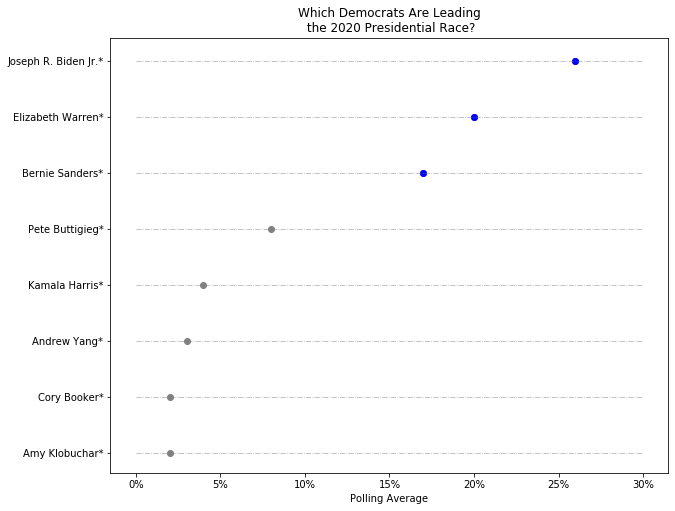

In [29]:
plt.figure(figsize=(10,8))

plt.scatter(x = sorteddf['National Polling Average (Percentage)'].iloc[-8:],
            y = sorteddf['Qualified for the November debate*'].iloc[-8:],
           color = 'grey')

plt.scatter(x = sorteddf['National Polling Average (Percentage)'].iloc[-3:],
            y = sorteddf['Qualified for the November debate*'].iloc[-3:],
           color = 'blue')

ax=plt.gca()
ax.hlines(y= sorteddf['Qualified for the November debate*'][9:],
         xmin = 0,
         xmax = 30,
         color = 'grey',
         alpha = 0.6,
         linestyle = "dashdot",
         linewidth = 0.8)

plt.xlabel('Polling Average')
ax.set_xticks(np.arange(0,31,5))
ax.set_xticklabels([str(i) + '%' for i in np.arange(0,31,5)])
plt.title("Which Democrats Are Leading\n the 2020 Presidential Race?")
plt.show()

In [30]:
#4# Create a tree map 
abc = sorteddf.loc[sorteddf['National Polling Average (Percentage)'] > 1 ]
abc.sum()

Qualified for the November debate*       Amy Klobuchar*Cory Booker*Andrew Yang*Kamala H...
National Polling Average (Percentage)                                                   82
Individual Contributions ($ Millions)                                                280.4
Weekly News Coverage (Ranking)                                                          41
dtype: object

In [31]:
individualcontributions = [(i/280.4)*100 for i in abc['Individual Contributions ($ Millions)']]

In [32]:
abc['Money received as %age of total'] = individualcontributions
abc = abc.round()
abc

C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Qualified for the November debate*,National Polling Average (Percentage),Individual Contributions ($ Millions),Weekly News Coverage (Ranking),Money received as %age of total
6,Amy Klobuchar*,2,14.0,6,5.0
7,Cory Booker*,2,16.0,9,6.0
5,Andrew Yang*,3,15.0,11,5.0
4,Kamala Harris*,4,36.0,5,13.0
3,Pete Buttigieg*,8,52.0,4,18.0
2,Bernie Sanders*,17,62.0,3,22.0
1,Elizabeth Warren*,20,50.0,2,18.0
0,Joseph R. Biden Jr.*,26,38.0,1,13.0


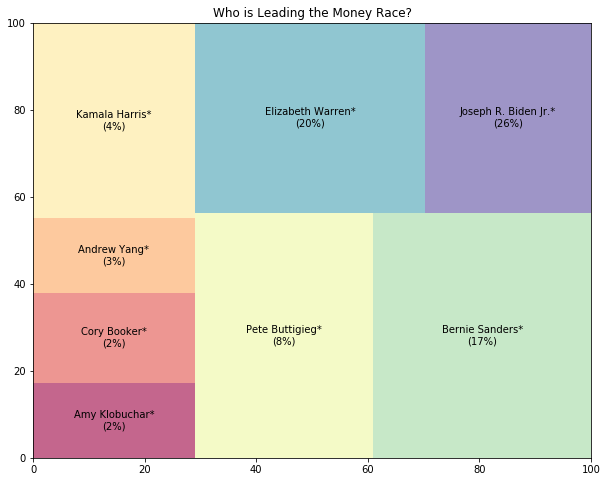

In [33]:
plt.figure(figsize = (10,8))
squarify.plot(sizes = abc['Money received as %age of total'], 
              label = abc.apply(lambda x:str(x[0]) + '\n' + '(' + str(x[1]) + '%'')', axis = 1), 
              color = plt.get_cmap('Spectral')(np.linspace(0,1,len(abc['Qualified for the November debate*']))),
              alpha = 0.6)
plt.title('Who is Leading the Money Race?')
plt.show()